# 1. Перед вами задача классификации космических объектов.

Датасет взят отсюда
fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17
The data released by the SDSS is under public domain. Its taken from the current data release RD17.
More information about the license: http://www.sdss.org/science/image-gallery/
SDSS Publications:
Abdurro’uf et al., The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. submitted to ApJS) [arXiv:2112.02026]

Целевая переменная называется class.

Решите задачу методами случайного леса, и рассмотренными на уроке бустингами.
Оцените результаты с помощью метрик presicion и recall.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
plt.rcParams["figure.figsize"] = (12,6)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv('star_classification.csv')

In [3]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [4]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [6]:
# Выделяем целевую переменную и кодируем ее
X = df.drop(['class', 'obj_ID'], axis = 1)
le = LabelEncoder()
y = le.fit_transform(df['class'])
np.unique(y)

array([0, 1, 2])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Bagging

### LogisticRegression

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

bag_clf = BaggingClassifier(
    LogisticRegression(random_state=42), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

In [50]:
precision_score(y_test, y_pred_bag, average='weighted', zero_division = 0), recall_score(y_test, y_pred_bag, average='weighted')

(0.35497764000000004, 0.5958)

### DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

bag_clf1 = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf1.fit(X_train, y_train)
y_pred_bag1 = bag_clf1.predict(X_test)

In [42]:
precision_score(y_test, y_pred_bag1, average='weighted'), recall_score(y_test, y_pred_bag1, average='weighted')

(0.9509072959458096, 0.95084)

# RandomForestClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators=500,
                                 max_depth = 5,
                                 n_jobs=-1, 
                                 random_state=42, 
                                 class_weight='balanced')
rndf_clf.fit(X_train, y_train)

y_pred_rndf = rndf_clf.predict(X_test)
y_pred_rndf

array([0, 2, 2, ..., 2, 0, 0])

In [43]:
precision_score(y_test, y_pred_rndf, average='weighted'), recall_score(y_test, y_pred_rndf, average='weighted')

(0.956627223546503, 0.95504)

# AdaBoostClassifier

In [13]:
sc = StandardScaler()
X_sc_train = sc.fit_transform(X_train)

In [14]:
# ADA BOOST
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(), n_estimators=50, # как правило деревья а не SVC (случайный лес много не даст но будет долго считать)
    algorithm="SAMME",
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_sc_train, y_train)#algorithm="SAMME.R"

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.5, random_state=42)

In [46]:
X_sc_test = sc.transform(X_test)
y_pred_ada = ada_clf.predict(X_sc_test)
precision_score(y_test, y_pred_ada, average='weighted'), recall_score(y_test, y_pred_ada, average='weighted')

(0.9640559098786088, 0.96408)

# GradientBoosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
gbc = GradientBoostingClassifier(n_estimators = 200,
                                max_depth = 4,
                                random_state = 15)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=200, random_state=15)

In [47]:
y_pred_gbc = gbc.predict(X_test)
precision_score(y_test, y_pred_gbc, average='weighted'), recall_score(y_test, y_pred_gbc, average='weighted')

(0.9782935866604965, 0.9784)

In [ ]:
# Все методы машинного обучения кроме бэггинга с логистической регрессией отработали хорошо. 
# Самый высокий результат у GradientBoosting

# 2. Творческая задача (из раздела машинное зрение).
Рассмотрим колесо от тележки, которая движется по рельсу. Подшипник колеса закрыт металлическим колпаком, колпак прикручен к колесу четырьмя болтами, болты визуально различимы.

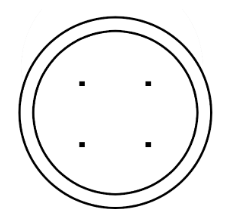

Схема колеса ))
Ваша задача придумать алгоритм, который будет давать ответ на вопрос - катится колесо по рельсу или скользит. 
Принимаются любые идеи в письменном виде.
Код писать необязательно.

## Описание решения

Логично предположить что когда колесо катится, то 4 точки преобразуются в круг. Соответственно нужно обучить алгоритм на обнаружение двух элементов.
Одного, состоящего из трех кружков, каждое внутри другого.
Второго, состоящего из двух кружков, каждое внутри другого и 4 точек внутри. 

Тогда если алгоритм находит три кружка, то колесо едет, если два кружка и 4 точки, то скользит.

Правда еще есть ситуация когда колесо медленно катится, тогда можно добавить третий элемент, просто два кружка. Тогда модель будет говорить что колесо катится медленно.

